In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
file_path = ("myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


# Part 1: Prepare the data

In [3]:
myopia_data = df.drop(['MYOPIC'], axis=1)
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
#Standardize your dataset into smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(myopia_data)

# Part 2: Apply Dimensionality Reduction

In [5]:
# Perform dimensionality reduction with PCA at n_components=0.90
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(scaled_data)

In [6]:
# pca_transformed_data variance to detect the importance of components. Principle component 1 and 2 
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [7]:
# Run t-SNE
tsne = TSNE(learning_rate=50)
transformed_features = tsne.fit_transform(pca_transformed_data)

In [8]:
# Check that dimensions have been reduced to two
transformed_features.shape

(618, 2)

In [9]:
myopia_data["X"] = transformed_features[:,0]
myopia_data["y"] = transformed_features[:,1]
myopia_data["Myopic"] = df["MYOPIC"]
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,X,y,Myopic
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,2.006910,21.454489,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,19.932583,-5.235174,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,-15.974042,-2.590130,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,3.582465,-25.303286,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,-10.074616,5.792199,0


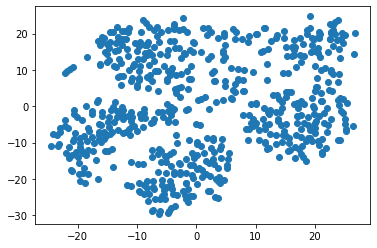

In [10]:
plt.scatter(myopia_data["X"], myopia_data["y"])
plt.show()

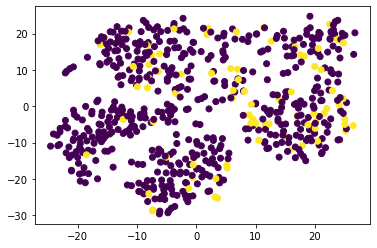

In [11]:
plt.scatter(myopia_data["X"], myopia_data["y"], c=myopia_data["Myopic"])
plt.show()

In [12]:
labels = myopia_data["Myopic"]
labels.value_counts()

0    537
1     81
Name: Myopic, dtype: int64

# Part 3: Perform a Cluster Analysis with K-means

In [13]:
df_myopia_pca = pd.DataFrame(data=pca_transformed_data, columns=["component 1", "component 2",
                                                                "component 3","component 4",
                                                                 "component 5","component 6",
                                                                 "component 7",
                                                                 "component 8","component 9",
                                                                 "component 10"])
df_myopia_pca.head()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


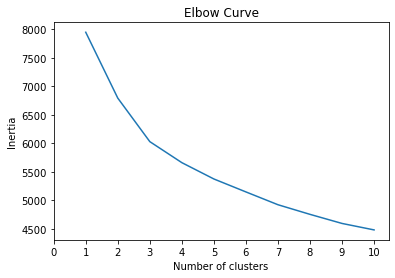

In [14]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


In [20]:
def get_clusters(k, df_myopia_pca):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(df_myopia_pca)

    # Predict clusters
    predictions = model.predict(df_myopia_pca)

    # Create return DataFrame with predicted clusters
    df_myopia_pca["myopic"] = model.labels_

    return df_myopia_pca

In [21]:
clusters = get_clusters(2, df_myopia_pca)
clusters.head()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,myopic
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,1


In [22]:
def show_clusters(df_myopia_pca):
    plt.scatter(df_myopia_pca['component 1'], df_myopia_pca['component 2'], 
                c=df_myopia_pca['myopic'])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

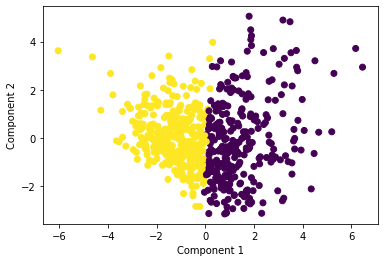

In [23]:
show_clusters(clusters)

# Part 4: Make a Recommendation

The Data is inconclusive to determine if patients can be clustered into kids that have or not have myopic. Dataset would need to be much larger to make a better prediction.